Nu au fost detectate obiecte pe banda de mers. Menţinem viteza.


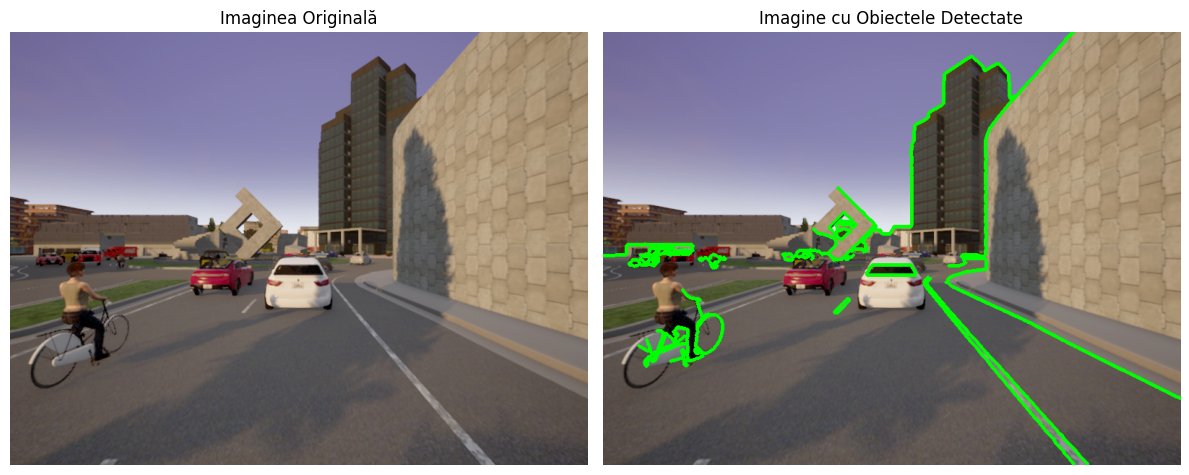

In [4]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

classes_df = pd.read_csv("D:/SBC/Proiect/classes_rgb_values.csv")
video_info_df = pd.read_csv("D:/SBC/Proiect/video_info.csv")

# Funcție pentru preprocesarea imaginii (scalare la gri, aplicare GaussianBlur și Canny edge detector)
def preprocess_image(image_path):
    # Încarcă imaginea
    image = cv2.imread(image_path)
    
    # Convertim imaginea la scală de gri
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicăm un filtru Gaussian pentru a reduce zgomotul
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Aplicăm detectorul Canny pentru a detecta margini
    edges = cv2.Canny(blurred, 50, 150)
    
    return edges, image

# Funcție pentru a detecta contururile
def detect_objects(edges):
    # Găsim contururile în imaginea cu margini
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrăm contururile mici (de exemplu, zgomotul din imagine)
    significant_contours = [cnt for cnt in contours if cv2.contourArea(cnt) >100]
    
    return significant_contours

# Funcție pentru a ajusta viteza în funcție de detectarea obiectelor
def adjust_speed(contours):
    if len(contours) > 20:
        # Dacă există contururi semnificative, presupunem că există un obiect în față
        print("Obiecte detectate pe banda de mers! Reducem viteza.")
        return "Reduce speed"
    else:
        print("Nu au fost detectate obiecte pe banda de mers. Menţinem viteza.")
        return "Increase speed"

# Funcție principală pentru procesul complet
def process_image(image_path):
    # Preprocesăm imaginea
    edges, original_image = preprocess_image(image_path)
    
    # Detectăm obiectele pe baza contururilor
    contours = detect_objects(edges)
    
    # Ajustăm viteza în funcție de contururile detectate
    speed_adjustment = adjust_speed(contours)
    
    # Desenăm contururile pe imaginea originală pentru vizualizare
    result_image = original_image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 3)
    
    # Afișăm imaginea originală și imaginea cu obiectele detectate folosind matplotlib
    return original_image, result_image

# Exemplu de utilizare
image_path = "D:/SBC/Proiect/images/Video_004/v004_0123.png"
original_image, result_image = process_image(image_path)

# Creăm ploturile pentru afișarea imaginilor
plt.figure(figsize=(12, 6))

# Afișăm imaginea originală
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Conversia la RGB pentru matplotlib
plt.title("Imaginea Originală")
plt.axis('off')  # Ascunde axele

# Afișăm imaginea cu contururile detectate
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Conversia la RGB pentru matplotlib
plt.title("Imagine cu Obiectele Detectate")
plt.axis('off')  # Ascunde axele

# Afișăm graficul
plt.tight_layout()
plt.show()


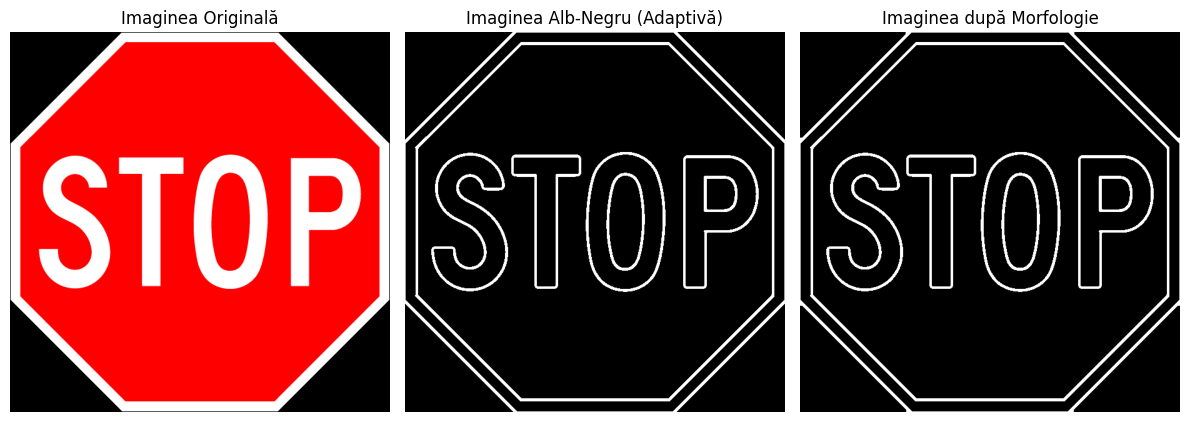

Text detectat:
STOP

Cuvântul 'STOP' a fost detectat!


In [2]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

image_path = r"D:\SBC\Proiect\Stop_sign.png"

if not os.path.exists(image_path):
    print(f"Imaginea nu există la calea: {os.path.abspath(image_path)}")
    exit()

# Încărcăm imaginea
image = cv2.imread(image_path)

if image is None:
    print(f"Imaginea nu a fost încărcată corect. Verifică calea sau formatul imaginii.")
    exit()

# 1. Vizualizăm imaginea originală
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imaginea Originală")
plt.axis('off')

# 2. Convertim imaginea la nivel de gri
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicați un filtru median pentru reducerea zgomotului
median_blur_image = cv2.medianBlur(gray_image, 3)

# Aplicăm un prag binar adaptiv
adaptive_thresh_image = cv2.adaptiveThreshold(median_blur_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 3. Vizualizăm imaginea alb-negru (binarizată)
plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh_image, cmap='gray')
plt.title("Imaginea Alb-Negru (Adaptivă)")
plt.axis('off')

# 4. Aplicăm operații morfologice pentru a îmbunătăți textul
kernel = np.ones((7, 7), np.uint8)
morph_image = cv2.morphologyEx(adaptive_thresh_image, cv2.MORPH_CLOSE, kernel)

# Vizualizăm imaginea cu operațiile morfologice
plt.subplot(1, 3, 3)
plt.imshow(morph_image, cmap='gray')
plt.title("Imaginea după Morfologie")
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Aplicăm Tesseract pentru a extrage textul din imaginea morfologică
detected_text = pytesseract.image_to_string(morph_image, lang='eng', config='--psm 6 --oem 3')

# 6. Căutăm explicit cuvântul "STOP" în textul detectat
stop_detected = any(word in detected_text.upper() for word in ["STOP", "STOP " , "Stop", "sTop"])

# Afișăm textul detectat și rezultatul
print("Text detectat:")
print(detected_text)
if stop_detected:
    print("Cuvântul 'STOP' a fost detectat!")
else:
    print("Cuvântul 'STOP' nu a fost detectat.")


Limita de viteză este: 130 km/h


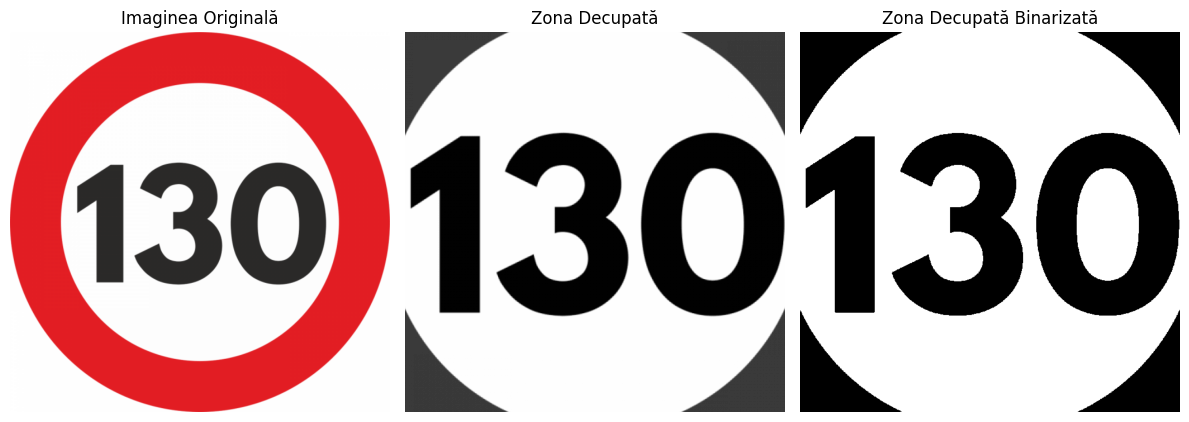

In [5]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Încărcăm imaginea
image_path = r"D:\SBC\Proiect\130.png"
image = cv2.imread(image_path)

if image is None:
    print("Imaginea nu a fost încărcată corect. Verifică calea imaginii.")
    exit()

# Convertim imaginea la nivel de gri
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Decupăm zona centrală (zona cu textul)
height, width = gray_image.shape
center_x, center_y = width // 2, height // 2
crop_size = min(width, height) // 3  # Dimensiunea decupajului
cropped_image = gray_image[center_y - crop_size:center_y + crop_size, center_x - crop_size:center_x + crop_size]

# Aplicăm binarizarea pe zona decupată
_, binary_cropped_image = cv2.threshold(cropped_image, 128, 1000, cv2.THRESH_BINARY)

# Aplicăm Tesseract pe imaginea decupată
detected_text = pytesseract.image_to_string(binary_cropped_image, lang='eng', config='--psm 9')

# Căutăm limita de viteză în textul detectat
speed_limit_match = re.search(r'\d+', detected_text)
if speed_limit_match:
    speed_limit = speed_limit_match.group()
    print(f"Limita de viteză este: {speed_limit} km/h")
else:
    print("Nu s-a detectat o limită de viteză în imagine.")

# Plotăm imaginile
plt.figure(figsize=(12, 6))

# Imaginea originală
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imaginea Originală")
plt.axis('off')

# Imaginea decupată
plt.subplot(1, 3, 2)
plt.imshow(cropped_image, cmap='gray')
plt.title("Zona Decupată")
plt.axis('off')

# Imaginea binarizată
plt.subplot(1, 3, 3)
plt.imshow(binary_cropped_image, cmap='gray')
plt.title("Zona Decupată Binarizată")
plt.axis('off')

plt.tight_layout()
plt.show()
